#Scope:
1. Identify the pattern for leaving employees
2. Predict the probablity of whether a employee will stay with organisation or not

# Input Data 

Credit  : Kaggle

Dataset Link  : https://www.kaggle.com/code/jacksonchou/hr-analytics/data

I downloaded the daatset from above link  and stored it in my google drive.

## Working with google drive

In [ ]:
# Mounting the google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy the file from google drive to google colab (Python 3 Google compute Engine)

!cp '/content/drive/MyDrive/HR_comma_sep.csv' .


# EDA (Exploratory Data Analysis)

In [ ]:
# Loading the data and creating a dataframe using pandas library 
import pandas as pd
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Gettign the size of the dataframe 
df.shape

(14999, 10)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
# Checking whether there is any null values in any entry:
for column in df.columns:
  count_nan = df[column].isnull().sum()
  print(f'Null values in column {column} is  => {count_nan}')

Null values in column satisfaction_level is  => 0
Null values in column last_evaluation is  => 0
Null values in column number_project is  => 0
Null values in column average_montly_hours is  => 0
Null values in column time_spend_company is  => 0
Null values in column Work_accident is  => 0
Null values in column left is  => 0
Null values in column promotion_last_5years is  => 0
Null values in column sales is  => 0
Null values in column salary is  => 0


In [ ]:
# The column named left gives us whether employee stays with the company or not which is our target

df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

> The data is imbalanecd , but in this case we can not expect the balance based on the nature of the problem we are solving .

### Number of Projects Vs Employee Leaving

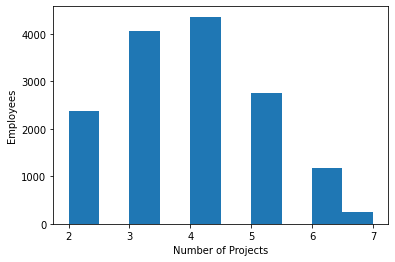

In [ ]:
# Exploring the impact of Number of Projects vs Employee Leaving 

import matplotlib.pyplot as plt
plt.ylabel('Employees')
plt.xlabel('Number of Projects')
plt.hist(df.number_project,bins=10);

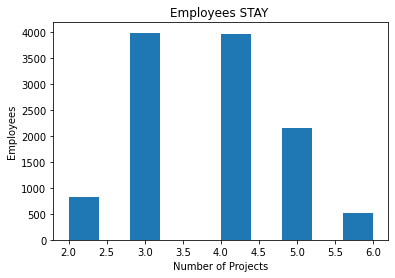

In [ ]:
plt.title('Employees STAY ')
plt.ylabel('Employees')
plt.xlabel('Number of Projects')
plt.hist(df.loc[df.left!=1]['number_project'],bins=10);

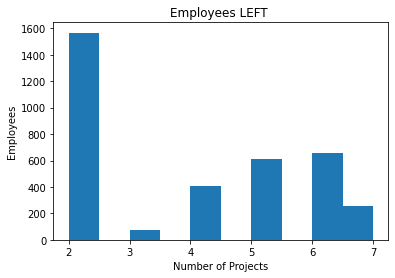

In [ ]:
plt.title('Employees LEFT ')
plt.ylabel('Employees')
plt.xlabel('Number of Projects')
plt.hist(df.loc[df.left==1]['number_project'],bins=10,);

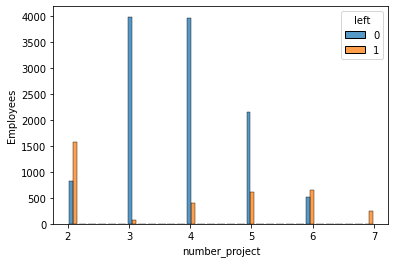

In [ ]:
# In order to compare we need to combine the above two plots 
import seaborn as sns
plt.ylabel('Employees')
sns.histplot(data=df, x="number_project", hue="left",multiple="dodge", shrink=.8)

> Based on the number of projects (HIGH) , the employee leaves the organisation , Also persons allocated to two projects also left organisation in a considerable amount, there could be additional reason such as project pressure, compensation , recognisation etc as a reason

### Avergae Monthly Hours Vs Employee Leaving

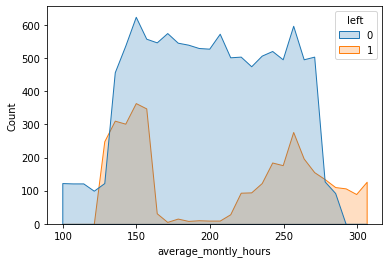

In [ ]:
sns.histplot(data=df, x="average_montly_hours", hue="left",element='poly')

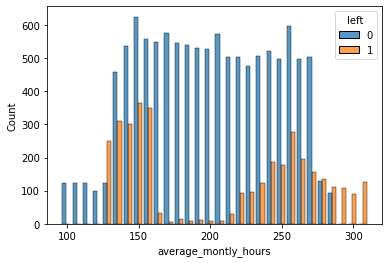

In [ ]:

sns.histplot(data=df, x="average_montly_hours", hue="left",multiple="dodge", shrink=.8)


> Those who are working more hours , high probablity of leaving the organisation
---



# Pre- processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['department']=encoder.fit_transform(df['sales'])
df['salary']=df['salary'].map({'low':1,'medium':2,'high':3})

In [ ]:
encoder.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [ ]:
# There is no need for column sales since that represented by new column of info
# we created by encoding

df.drop(['sales'],axis=1,inplace=True)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department
0,0.38,0.53,2,157,3,0,1,0,1,7
1,0.80,0.86,5,262,6,0,1,0,2,7
2,0.11,0.88,7,272,4,0,1,0,2,7
3,0.72,0.87,5,223,5,0,1,0,1,7
4,0.37,0.52,2,159,3,0,1,0,1,7


In [ ]:
# Feature should not contain the taget label , hence dropping the column 
features = df.drop('left',axis=1)

In [ ]:
# Extracting only the taget from the dataframe
labels = df['left']

## Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(features,labels,test_size=0.2,random_state=42,stratify=labels)

In [ ]:
print(f"The shape of the X_train {X_train.shape}")
print(f"The shape of the X_test {X_test.shape}")
print(f"The shape of the y_train {y_train.shape}")
print(f"The shape of the y_test {y_test.shape}")

The shape of the X_train (11999, 9)
The shape of the X_test (3000, 9)
The shape of the y_train (11999,)
The shape of the y_test (3000,)


### Scaling

> We have to do scaling to have the feature values in certain range 

> ML models performs better on scaled data

In [ ]:
monthly_hours_min = X_train.average_montly_hours.min()
monthly_hours_max = X_train.average_montly_hours.max()
time_spend_min = X_train.time_spend_company.min()
time_spend_max =X_train.time_spend_company.max()

In [ ]:
print(X_train.average_montly_hours.min(), X_train.average_montly_hours.max())
print(X_train.time_spend_company.min(), X_train.time_spend_company.max())

96 310
2 10


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# We are applying scaler transformation for the two columns in single step
X_train[['average_montly_hours','time_spend_company']] = scaler.fit_transform(
    X_train[['average_montly_hours','time_spend_company']].values)
print(X_train.average_montly_hours.min(), X_train.average_montly_hours.max())
print(X_train.time_spend_company.min(), X_train.time_spend_company.max())


0.0 0.9999999999999999
0.0 1.0


> We have to transform the test dataset 

🎨 **Note**: In practice we get the test data after building the model, hence we have to fit only the train data to scaler transformer. 

In [ ]:
X_test[['average_montly_hours','time_spend_company']] = scaler.transform(
    X_test[['average_montly_hours','time_spend_company']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#Model

## Pipeline - bulid model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(
    [
        ('clf',RandomForestClassifier())
    ]
)

# Avoid fitting X_train , it will fit with feature names
# This makes when we get user input for prediction
model.fit(X_train.values,y_train.values)


Pipeline(steps=[('clf', RandomForestClassifier())])

## Predict 

In [ ]:
y_pred = model.predict(X_test.values)

## Evaluate the model

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



## Save the model

In [ ]:
import joblib
# save the model to disk
filename = 'hr_analytics_model.sav'
joblib.dump(model, filename)
 

['hr_analytics_model.sav']

In [ ]:

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test.values, y_test.values)
print(result)

0.9903333333333333


# User Input

>  



1. You can create a web app and receive user inputs and pass it to the model
2. Prediction at server 
3. send the output to client



In [ ]:
# User Input 
satisfaction_level = 0.7  #( 0 to 1 )
last_evaluation = 0.8   #(0 to 1 )
number_project = 4     #(Actual numbers)
user_average_monthly_hours = 330 #(Actual hours)    # TO BE SCALED In the range of training min max data
user_time_spend_company =  10 #(Actual hours per day)  # TO BE SCALED In the range of training min max data
Work_accident = 0 #(If incurred accident in working time)
promotion_last_5years = 1 #(Discrete o or 1 )
salary = 3 #( 1 for low , 2 for medium , 3 for high)
department = 3 #( {'IT':0, 'RandD':1, 'accounting':2, 'hr':3, 'management':4, 'marketing':5,'product_mng':6, 'sales':7, 'support':8, 'technical':9)

In [ ]:
# User Input 
satisfaction_level = 0.4  #( 0 to 1 )
last_evaluation = 0.5   #(0 to 1 )
number_project = 6     #(Actual numbers)
user_average_monthly_hours = 320 #(Actual hours)    # TO BE SCALED In the range of training min max data
user_time_spend_company =  1 #(Actual hours per day)  # TO BE SCALED In the range of training min max data
Work_accident = 0 #(If incurred accident in working time)
promotion_last_5years = 0 #(Discrete o or 1 )
salary = 2 #( 1 for low , 2 for medium , 3 for high)
department = 5 #( {'IT':0, 'RandD':1, 'accounting':2, 'hr':3, 'management':4, 'marketing':5,'product_mng':6, 'sales':7, 'support':8, 'technical':9)

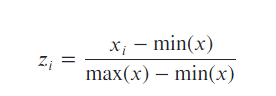

In [ ]:
# For Ref only (NEVER UNCOMMENT THIS)

# monthly_hours_min = X_train.average_montly_hours.min()
# monthly_hours_max = X_train.average_montly_hours.max()
# time_spend_min = X_train.time_spend_company.min()
# time_spend_max =X_train.time_spend_company.max()

In [ ]:
scaled_average_monthly_hours = (user_average_monthly_hours-monthly_hours_min)/(
    monthly_hours_max-monthly_hours_min
)

scaled_time_spend = (user_time_spend_company-time_spend_min)/(time_spend_max-time_spend_min)

In [ ]:
print(scaled_average_monthly_hours, scaled_time_spend)

1.0467289719626167 -0.125


We have to create the inputs as numpy array  

In [ ]:
import numpy as np 
user_input_array=np.array([satisfaction_level,last_evaluation,number_project,
                           scaled_average_monthly_hours,scaled_time_spend,
                           Work_accident,promotion_last_5years,
                          salary,department])

# The array should be of 2d , hence expanding the dims
reshaped_user_input_array = np.expand_dims(user_input_array, axis=0)
#print(reshaped_test.shape)

In [ ]:
# Predict 
pred = model.predict(reshaped_user_input_array)

# Predict the probablity
pred_prob = model.predict_proba(reshaped_user_input_array)

print(pred_prob)

if pred:
  print(f" The employee will leave the organisation , Probablity : {pred_prob[0][1]}")
else:
  print(f" The employee will stay with the organisation , Probablity : {pred_prob[0][0]}")


[[0.28 0.72]]
 The employee will leave the organisation , Probablity : 0.72
